In [1]:
import torch
from gaussian_net import ImagePairDataset

device = "cuda"
orig_imgs = torch.load('dataset_raw/long_exp.pt', weights_only=True)
filter_imgs = torch.load('dataset_raw/filter_long_exp.pt', weights_only=True)

dataset = ImagePairDataset(orig_imgs.permute(0, 3, 1, 2), filter_imgs.permute(0, 3, 1, 2))

In [2]:
from gaussian_net import GaussianNet

net = GaussianNet(k_size=17).to(device)
net.load_state_dict(torch.load('net.pth', weights_only=True))
net.eval()

GaussianNet(
  (enc1): Conv2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (encoder_sigma): Sequential(
    (0): Conv2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (dec1): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (dec2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (dec3): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (dec4): ConvTranspose2d(16

270 1130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Gray World White Balancing Coefficients:  [1.9215949, 1.0, 1.1740484]
Image size after demosaic_vanilla:  (512, 512, 3)
Gray World White Balancing Coefficients:  [1.9207189, 1.0, 1.1923207]
Image size after demosaic_vanilla:  (512, 512, 3)
Gray World White Balancing Coefficients:  [1.7781808, 1.0, 1.1801927]
Image size after demosaic_vanilla:  (512, 512, 3)


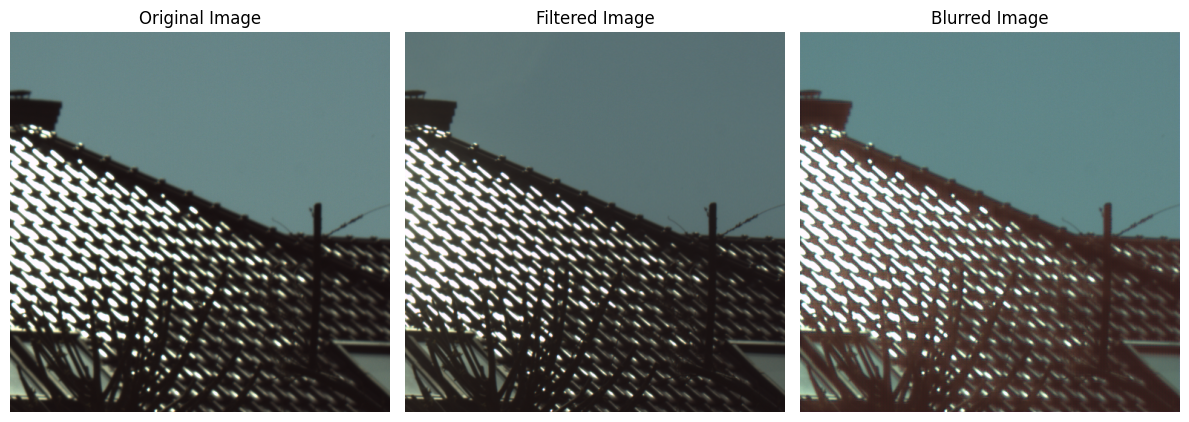

In [29]:
from raw_utils import unpack_raw, demosaic_vanilla
from matplotlib import pyplot as plt
from gaussian_net import set_seed
from raw_utils import white_balance_gray_world


i = 0

value = dataset[i]
orig_value = value[0].unsqueeze(0).cuda()
filtered_value = value[1].unsqueeze(0).cuda()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(demosaic_vanilla(white_balance_gray_world(unpack_raw(orig_value.squeeze().permute(1, 2, 0).cpu().numpy()))))
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(demosaic_vanilla(white_balance_gray_world(unpack_raw(filtered_value.squeeze().permute(1, 2, 0).cpu().numpy()))))
plt.title("Filtered Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(demosaic_vanilla(white_balance_gray_world(unpack_raw(net(orig_value).squeeze().permute(1, 2, 0).detach().cpu().numpy()))))
plt.title("Blurred Image")
plt.axis("off")


plt.tight_layout()
plt.show()

In [37]:
net(orig_value).squeeze().permute(1, 2, 0).detach().cpu().numpy().min()

0.056014113